## Exploration

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import wrangle as w
import explore as e
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr



In [2]:
df = w.wrangle_zillow()

In [3]:
df.head()

,bedcount,bathcount,sqft,tax_value,yearbuilt,taxamount,fips
4,4.0,2.0,3633,296425.0,2005,6941.39,6037
6,3.0,4.0,1620,847770.0,2011,10244.94,6037
7,3.0,2.0,2077,646760.0,1926,7924.68,6037
11,0.0,0.0,1200,5328.0,1972,91.60,6037
14,0.0,0.0,171,6920.0,1973,255.17,6037


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   bedcount   float64
 1   bathcount  float64
 2   sqft       int64  
 3   tax_value  float64
 4   yearbuilt  int64  
 5   taxamount  float64
 6   fips       object 
dtypes: float64(4), int64(2), object(1)
memory usage: 130.6+ MB


In [5]:
#split the data
train, validate, test = w.split_zillow(df)

## 3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [6]:
def plot_variable_pairs(df):
    
    df = df.sample(n = 10000)
    
    cols = ['bedcount', 'bathcount','sqft','yearbuilt','taxamount','fips']
    
    target = 'tax_value'
    
    for col in cols:
        
        sns.lmplot(df, x = col, y = target)
        


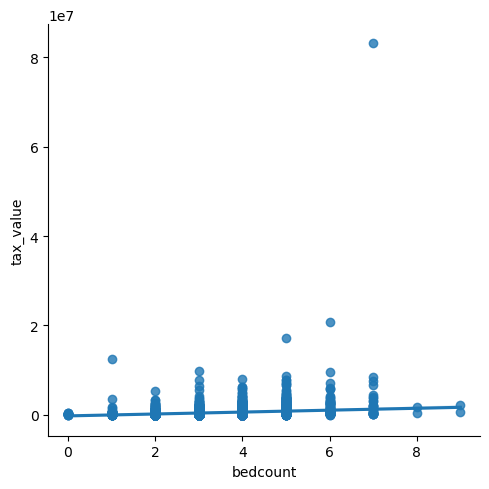

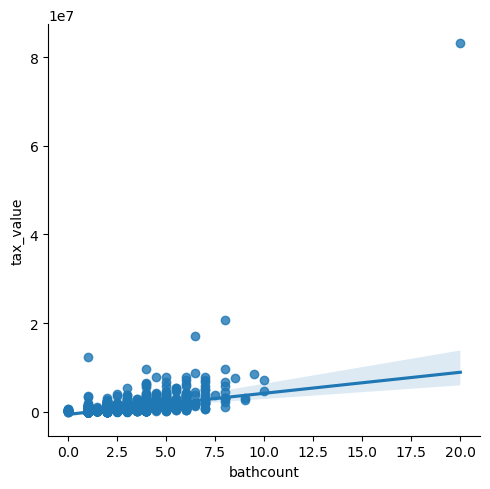

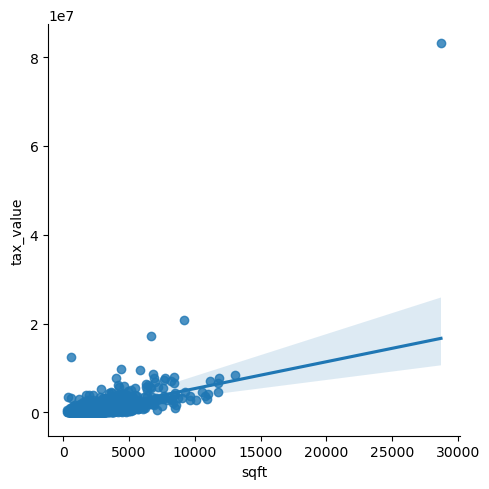

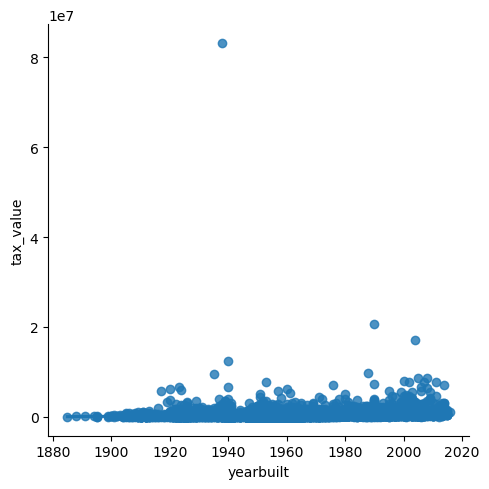

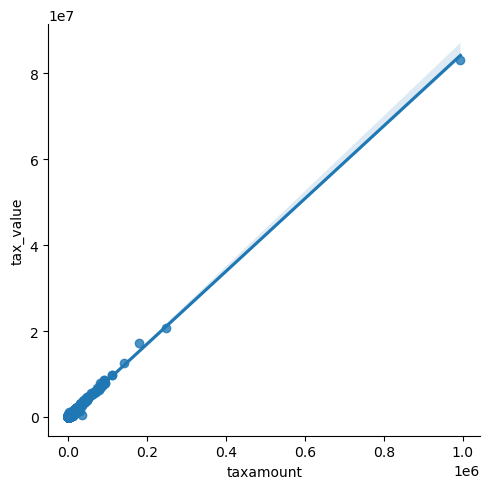

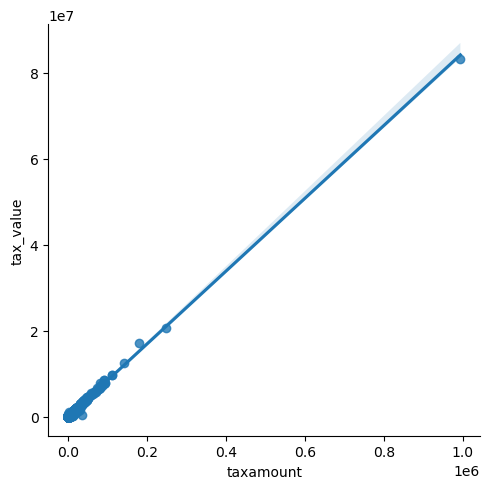

In [7]:
e.plot_variable_pairs(train)

## 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [8]:
def plot_categorical_and_continuous_vars(df, cat_var_col, con_var_col):
    
    df = df.sample(n=1000)
    
    fig, axs = plt.subplots(1,3, figsize=(18,8))
    
    sns.stripplot(ax=axs[0], x=cat_var_col, y=con_var_col, data=df)
    axs[0].set_title('stripplot')
    
    sns.boxplot(ax=axs[1], x=cat_var_col, y=con_var_col, data=df)
    axs[1].set_title('boxplot')
    
    sns.swarmplot(ax=axs[2], x=cat_var_col, y=con_var_col, data=df, s=1)
    axs[2].set_title('swarmplot')
    

    

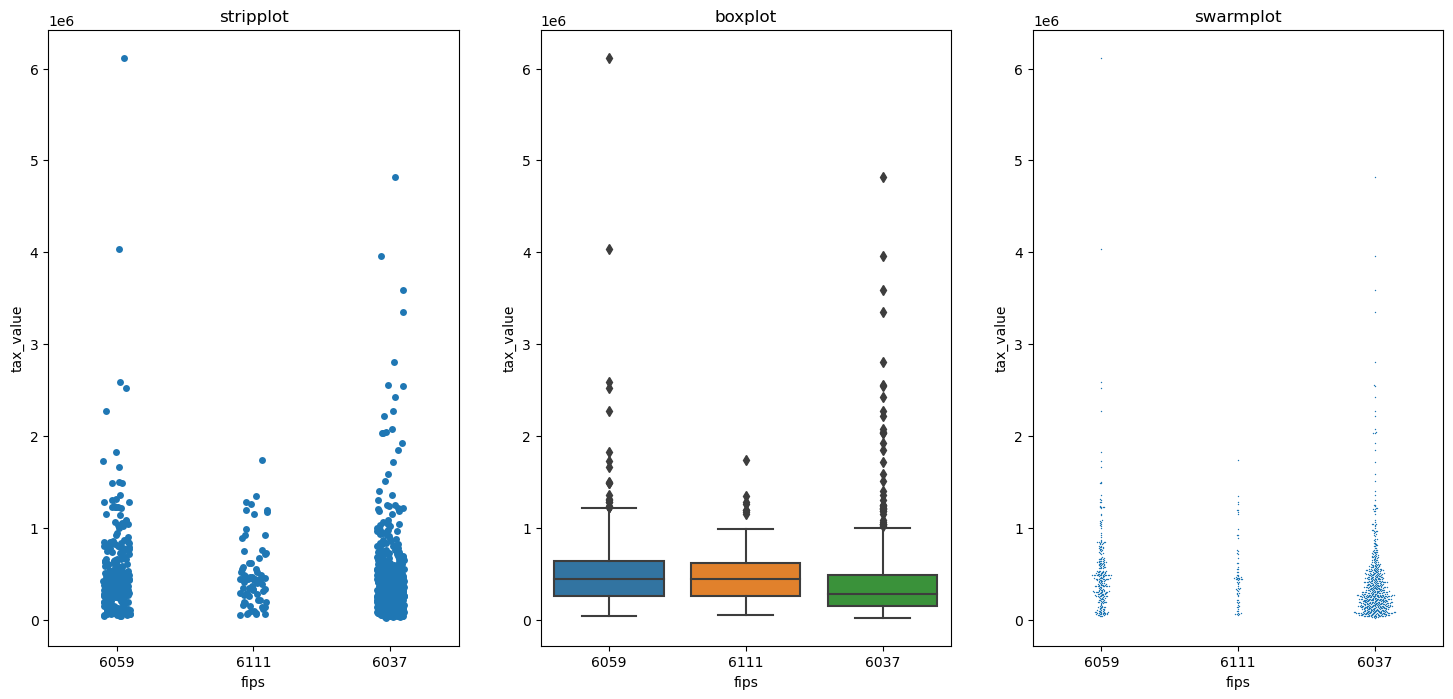

In [9]:
e.plot_categorical_and_continuous_vars(train, 'fips', 'tax_value')

The data contains a number of outliers that will need to be addressed. Outliers are data points that are significantly different from the rest of the data. They can skew the results of statistical analysis, so it is important to identify and remove them.



## 7. Come up with some initial hypotheses based on your goal of predicting property value.

# Hypothesis  I

Tax amount is the most important factor in determining the value of a home. This is because tax amount is directly related to the price of the house. To test this hypothesis, we will group the data by county, since each county has different tax levels.

$H_0$: There is no statistically significant correlation between home value and tax amount.

$H_A$: There is a statistically significant correlation between home value and tax amount.

## 8. Visualize all combinations of variables in some way.

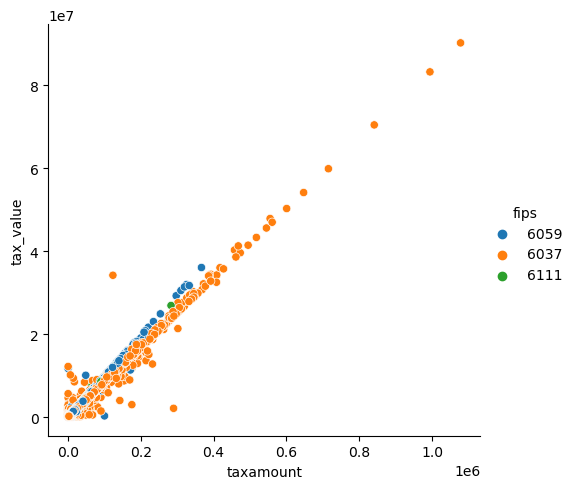

In [11]:
sns.relplot(train, x='taxamount', y='tax_value', hue='fips', kind='scatter')

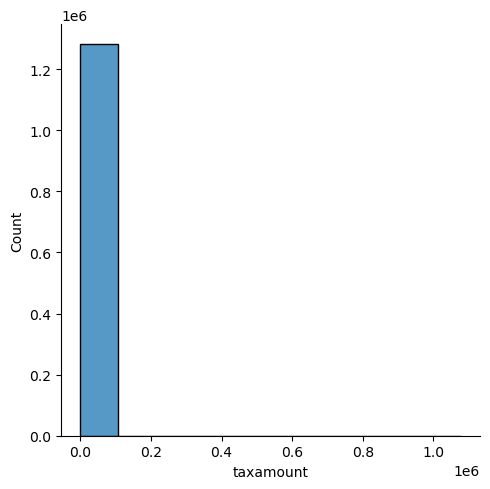

In [12]:
sns.displot(train, x='taxamount', bins = 10)


## 9. Run the appropriate statistical tests where needed.
Based on the scatterplot there is a strong relationship between tax value and home value for all three counties. There is not a normal distribution so we will test correlation with the Spearman R correlation test. The p is low so we reject the null hypothesis.

In [14]:
r, p = spearmanr(train.taxamount, train.tax_value)

print('r:', r)
print('p:', p)

r: 0.9786539923389032
p: 0.0


We  reject the null hypothesis.


# Hypothesis II


Is there a relationship between bedroom count and home value? 

$H_0$: There is no correlation between house value and bedroom count.

$H_A$: There is a correlation between house value and bedroom count.

There is not a normal distrubution so we will use Spearman R test.

r: 0.29577717581338375
p: 0.0


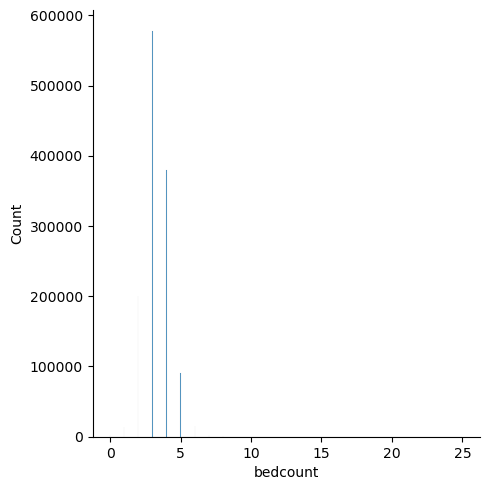

In [15]:
sns.displot(train, x='bedcount')

r, p = spearmanr(train.bedcount, train.tax_value)

print('r:', r)
print('p:', p)


In [ ]:
We fail to reject the null hypothesis.

# Hypothesis III

Based on the initial visualizations it seems that bathroom count is related to house value

$H_0$: There is no correlation between home value and bathroom count.

$H_A$: There is a correlation between home value and bathroom count.

There is not a normal distribution so we will use Spearman R test.

r: 0.48238721874492946
p:  0.0


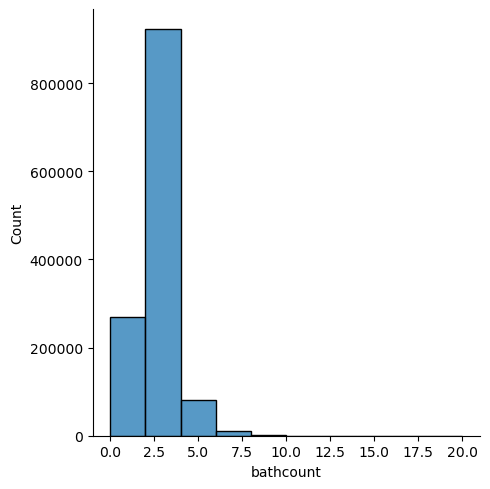

In [16]:
sns.displot(train, x='bathcount', bins=10)

r, p = spearmanr(train.bathcount, train.tax_value)

print('r:', r)
print('p: ', p)


We fail to reject the null hypothesis.

# Hypothesis IV

$H_0$: There is no correlation between the tax value and the year it was built.

$H_A$: There is a correlation between the tax value and the year it was built.

There is a normal distribution so we will use the Pearson R test.

r: 0.19044732862029082
p:  0.0


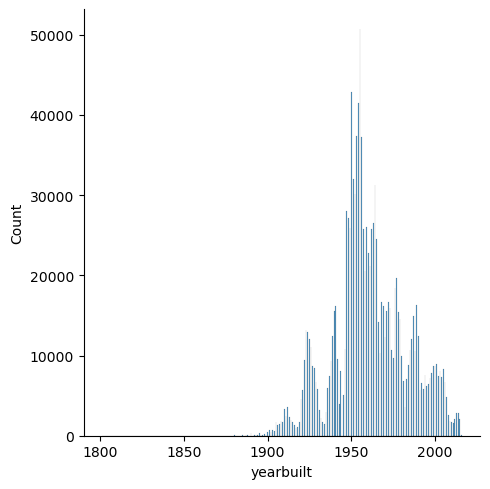

In [17]:
sns.displot(train, x='yearbuilt')

r, p = pearsonr(train.yearbuilt, train.tax_value)

print('r:', r)
print('p: ', p)


We fail to reject the null hypothesis.

## 10. What independent variables are correlated with the dependent variable, home value?
Bedroom count, bathroom count, tax amount and year built are all dependent variables that are correlated to home value.

# Hypothesis V

$H_0$: There is no correlation between the number of bedrooms and the number of bathrooms in a home.

$H_A$: There is a correlation between the number of bedrooms and the number of bathrooms in a home.

In [18]:
r, p = spearmanr(train.bedcount, train.bathcount)

print('r:', r)
print('p:', p)


r: 0.6344528506460355
p: 0.0


In [ ]:
We fail to reject the null hypothesis.

# Hypothesis VI

We hypothesize that there is a negative correlation between the year a home was built and its square footage. In other words, I believe that older homes are likely to be smaller than newer homes. I would like to test this hypothesis by plotting the year built against the square footage for a dataset of homes.


$H_0$: There is no correlation between the year a home was built and its square footage

$H_A$: There is a correlation between the year a home was built and its square footage.

In [19]:
r, p = spearmanr(train.yearbuilt, train.sqft)

print('r:', r)
print('p:', p)


r: 0.5115071563533982
p: 0.0


We fail to reject the null hypothesis.

## 11. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)

There is a correlation between bedroom and bathroom counts, and a correlation between year built and square footag

## 12. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

## 13. Explore your dataset with any other visualizations you think will be helpful.